# Découvrir le module [scipy](https://docs.scipy.org/doc/scipy/index.html)

## Les fonction d'interpolations

La fonction [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) permet de faire des interpolations linéaire simple sur un jeu de données.

Imaginons que nous ayons obtenu un jeu de données parcellaires comme celui qui nous simulons ci-dessous (on imagine qu'on ne connait pas l'équation de la courbe qu'on pressent en voyant les points).

note: ce texte s'inspire de ce [tutoriel de machine learnia](https://www.youtube.com/watch?v=P0Xr5TIML8U&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=17&t=336s) qu'il est recommandé de visionner. On retrouve aussi le [cahier réalisé par l'auteur](https://github.com/MachineLearnia/Python-Machine-Learning/blob/master/16%20-%20Scipy.ipynb) sur github.

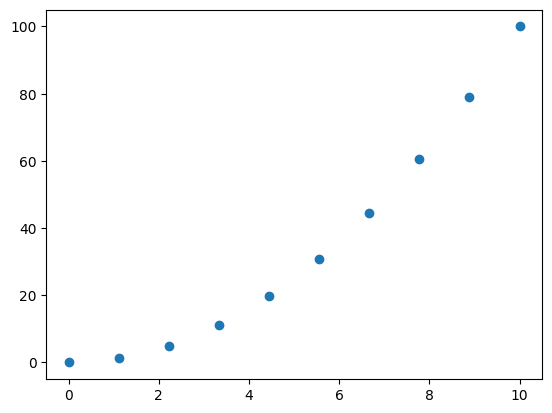

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# on construit un jeu de données
x0 = np.linspace(0,10, 10)
y0 = x0**2

ax1 =plt.scatter(x0,y0, marker='o')
plt.show()

On interpole maintenant entre ces points avec le fonction [interp1d]()

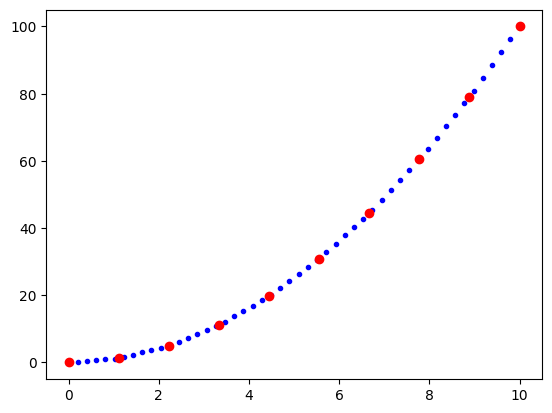

In [29]:
from scipy.interpolate import interp1d

f = interp1d(x0,y0,kind='linear')

x1 = np.linspace(0,10,50)


ax2 = plt.scatter(x1,f(x1), marker='.' , color='blue')
# pour afficher aussi les points d'origine dans cette nouvelle figure
ax1 = plt.scatter(x0,y0, marker='o', color='red')
plt.show()

Voici un autre exemple de données.

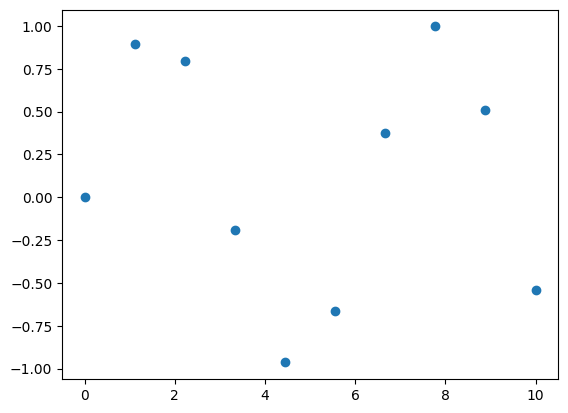

In [30]:
x0 = np.linspace(0,10,10)
y0 = np.sin(x0)
plt.scatter(x0,y0)
plt.show()

Voici ce que donnerait une interpolation linéaire.

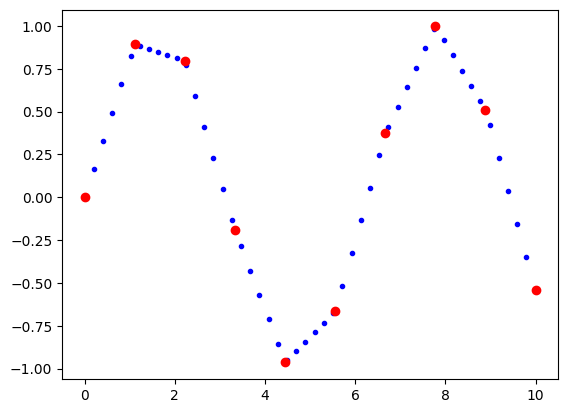

In [32]:
g = interp1d(x0,y0, kind='linear')
x1 = np.linspace(0,10,50)


plt.scatter(x1,g(x1), marker='.' , color='blue')
# pour afficher aussi les points d'origine dans cette nouvelle figure
plt.scatter(x0,y0, marker='o', color='red')
plt.show()

Ce qu'on peut améliorer avec une interpolation cubique.

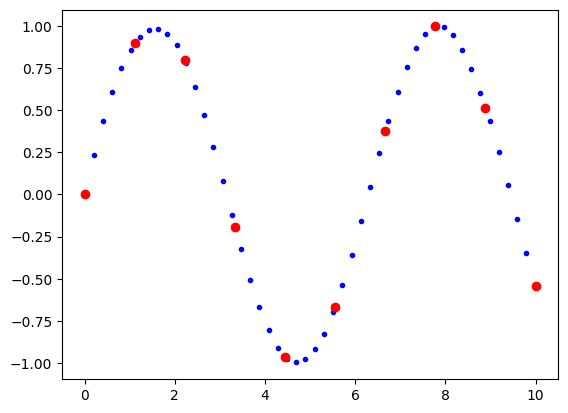

In [33]:
g = interp1d(x0,y0, kind='cubic')
x1 = np.linspace(0,10,50)


plt.scatter(x1,g(x1), marker='.' , color='blue')
# pour afficher aussi les points d'origine dans cette nouvelle figure
plt.scatter(x0,y0, marker='o', color='red')
plt.show()

On trouvera plus d'information sur les types d'interpolation sur le site de [scipy](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

## La fonction [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)

Nous allons reprendre l'exercice d'interpolation avec des points qui ont un bruit que nous simulons ici par la fonction random.

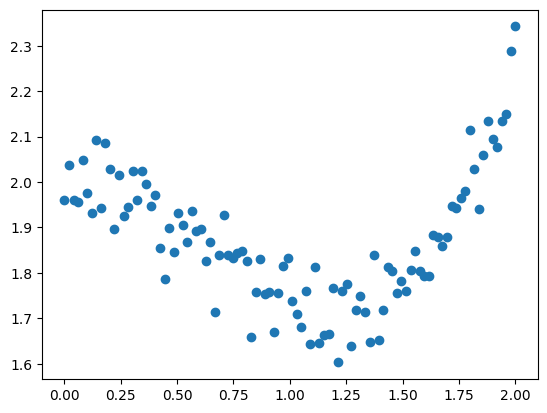

In [35]:
x0 = np.linspace(0,2, 100)
y0 = 1/3*x0**3 -3/5*x0**2 + 2 + np.random.randn(x0.shape[0])/20
plt.scatter(x0,y0)

On veut développer un modèle qui s'adapte au mieux avec ce jeu de données. On choisit ici comme modèle un polynome.

$$ f(x) = ax^3 + bx^2 +cx +d $$

Et on cherche donc les paramètre $a,b,c,d$.

Nous employons pour cela la commande [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) du module [optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) de scipy. Cette commande renvoie un tuple, la premier élément étant un tuple contenant les paramètres recherchés et le deuxièmes des covariances sur ces paramètres. Nous intéressons qu'on premier paramètre que nous donnons donc à la fonciton f avec l'utilisation de `*` qui transforme une liste (ou un tuple) en une suite de paramètres, ce dont nous avons besoin ici pour f.

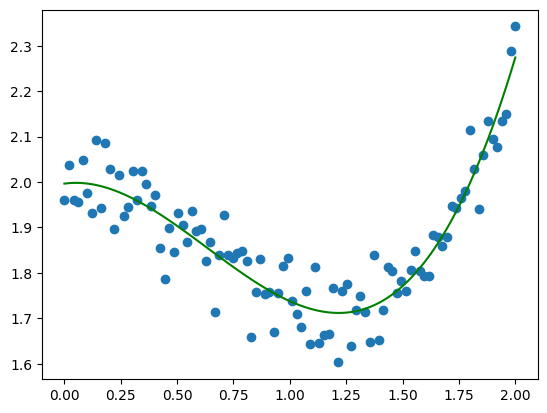

In [38]:
def f(x, a,b,c,d):
    return a*x**3+b*x**2+c*x+d

from scipy import optimize

params, params_cov = optimize.curve_fit(f, x0, y0)

plt.scatter(x0,y0)
plt.plot(x0, f(x0, *params), color='green')
plt.show()

Ces fonctions d'interpolation se retrouvent dans le modules [scikit-learn](https://scikit-learn.org/stable/index.html) de manière plus évoluée.

## Fonction [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

La fonction [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) du module [optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) de SciPy permet de trouver un minimum local. On peut faire plusieurs essais sur le code ci-dessous pour voir comment cette fonction s'arrête au premier minimum local rencontré.

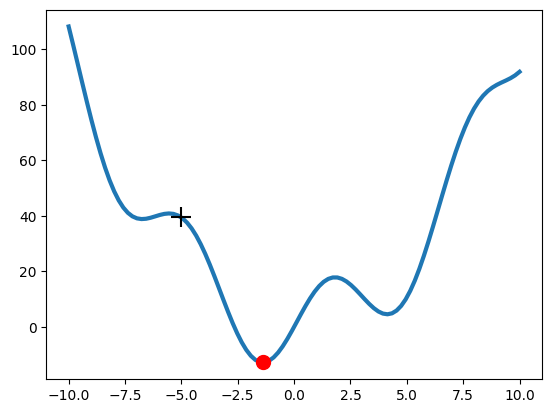

In [5]:
from scipy.optimize import minimize

def f(x):
    return x**2 + 15*np.sin(x)

x = np.linspace(-10, 10, 100)

x0 = -5  # <- changer cette valeur entre -10 et 10 et renlancer

plt.plot(x, f(x), lw=3, zorder = -1)
x_start, y_start = x0, f(x0)
x_min = minimize(f, x0=x_start).x[0]  # pour avoir un scalaire
plt.scatter(x_start,y_start, color='black', s= 200, marker='+', zorder=1)
plt.scatter(x_min,f(x_min), color='red', marker='o', zorder = 1, s= 100)
plt.show()

Quelques mots sur la génération de ce graphique. On a utilisé plusieurs paramètres de **matplotlib**. 

La ligne est affichée avec [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) et les points avec [scatter](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#scatter-plot). 

La couleur est donnée par le [paramètre](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) `c`, le type de marque par le paramètre `marker`. Le paramètre `s` indique la taille (*size*) en points typographiques, qui valent 1/72 de pouce. Pour la ligne, on utilise le [paramètre](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) `lw` pour *line width* (ce peut aussi s'écrire `linewidth`). On aurait aussi pu changer le style de la ligne (pointillé etc...) avec `linestyle`ou `ls` en raccourcis. Il existe des raccourcis pour donner les styles de ligne courant (`'--'` par exemple pour les pointillés). Enfin, le paramètre `zorder` défini la superposition des tracés les uns sur les autres.

Voici maintenant un autre exemple avec une fonction utilisant deux paramètres et qu'on visualise avec un tracé [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).

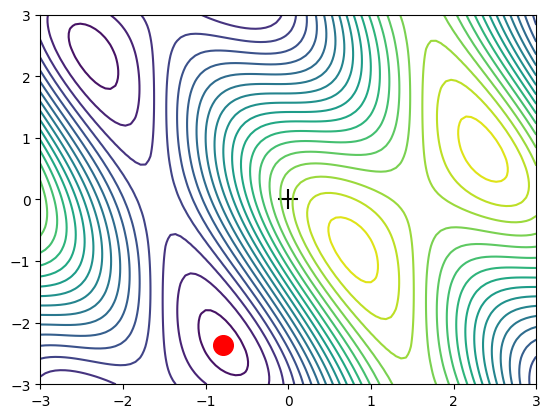

In [6]:
def g(x):
    return np.sin(x[0]) + np.cos(x[0] + x[1])*np.cos(x[0])

# tracé de la fonction en deux dimensions
X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X,Y) 
plt.contour(X, Y, g(np.array([X,Y])), 20)

# point de départ de la recherche
start = (0,0)
plt.scatter(start[0], start[1], c='black', s=200, marker = '+', zorder=1)

# lancement de la recherche et impression
RES = minimize(g, x0=start)
plt.scatter(RES.x[0], RES.x[1], c='red', s=200, marker='o', zorder=1)
plt.show()

# traitement du signal

Il existe plusieurs modules [scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) pout le traitement du signal :
- [Signal processing](https://docs.scipy.org/doc/scipy/tutorial/signal.html)
- [Fourier Transforms](https://docs.scipy.org/doc/scipy/tutorial/fft.html)

Voici un premier exemple pour éliminer une tendance linéaire autour d'un signal


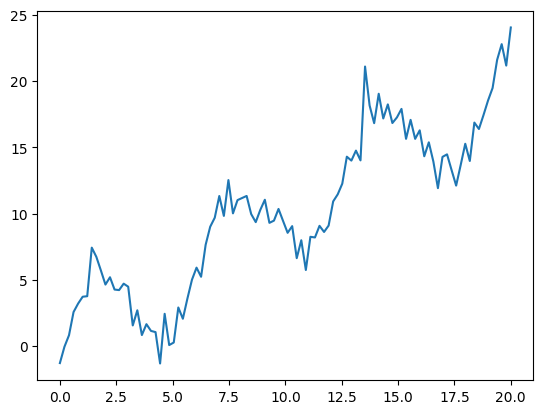

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)
plt.show()

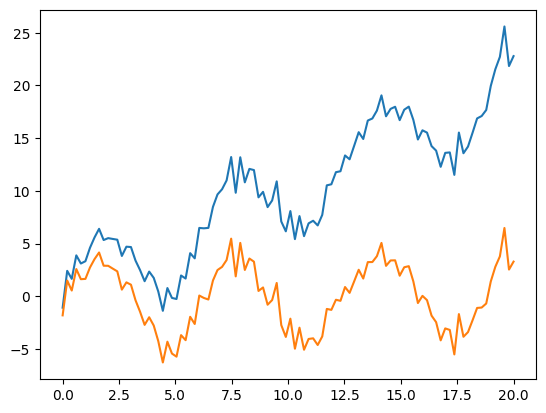

In [3]:
from scipy import signal
new_y = signal.detrend(y)

plt.plot(x,y)
plt.plot(x, new_y)
plt.show()

On a ici éliminé la tendance linéaire du signal.

La transformé de fourrier d'extraitre le spectre des fréquences d'un signal donné.

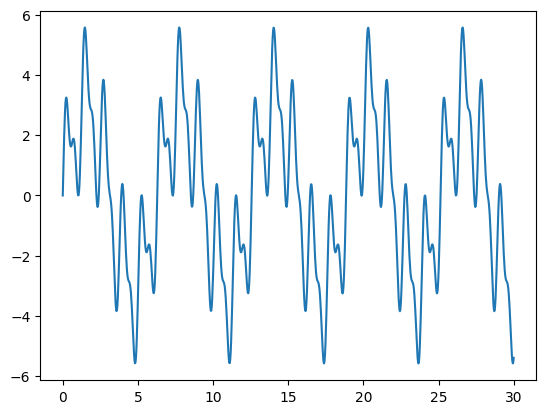

In [4]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)
plt.show()

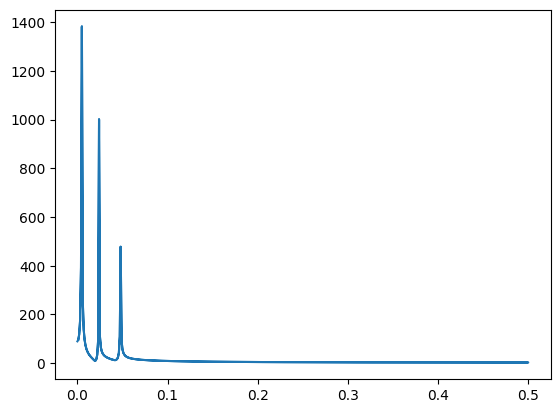

In [5]:
from scipy import fftpack

fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)
plt.show()

On retrouve ainsi la spectre du signal.

Voici l'utilisation de transformée de Fourier pour filter un signal.

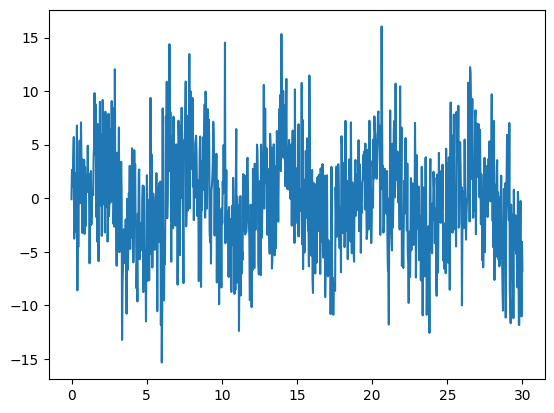

In [10]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + 4 * np.random.randn(x.shape[0])
plt.plot(x,y)
plt.show()

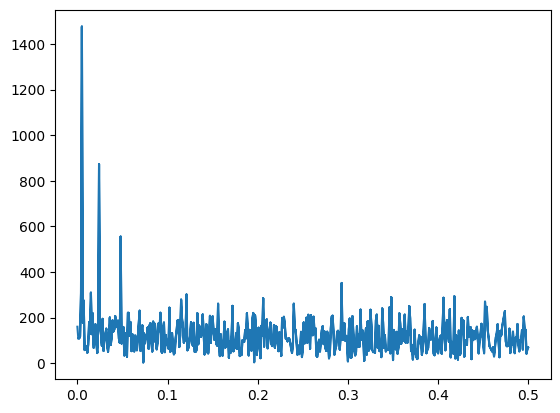

In [11]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)
plt.show()

On va maintenant filter le spectre de ce signal.

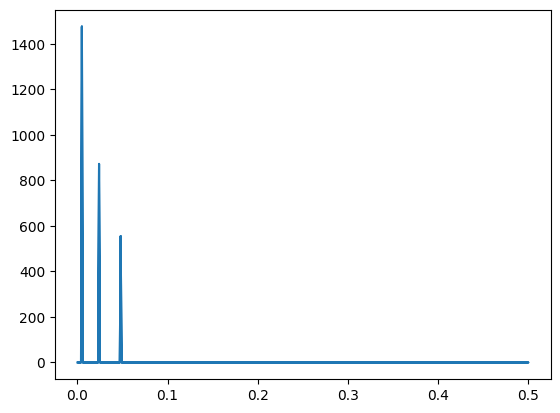

In [13]:
fourier[power<400] = 0
plt.plot(np.abs(frequences), np.abs(fourier))
plt.show()

On applique alors à ce nouveau spectre la transformée de Fourier inverse.

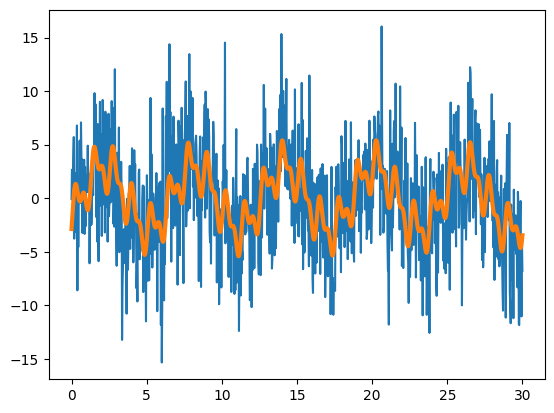

In [17]:
y1 = fftpack.ifft(fourier)
plt.plot(x,y)
plt.plot(x,y1, lw='3')
plt.show()


# Le traitement d'image

Le module [ndimage](https://docs.scipy.org/doc/scipy/tutorial/ndimage.html) propose beaucoup de fonction de traitrements d'image.

Il existe par exemple 

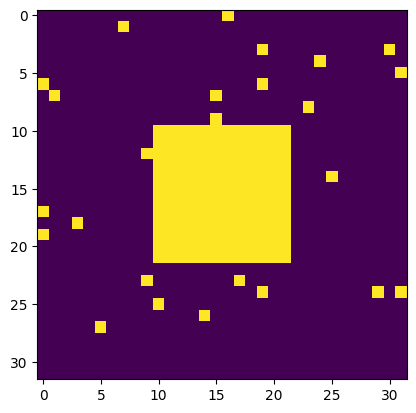

In [19]:
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30), np.random.randint(0,32,30)] = 1
plt.imshow(X)
plt.show()

In [10]:
from scipy import ndimage
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)
plt.show()

NameError: name 'X' is not defined

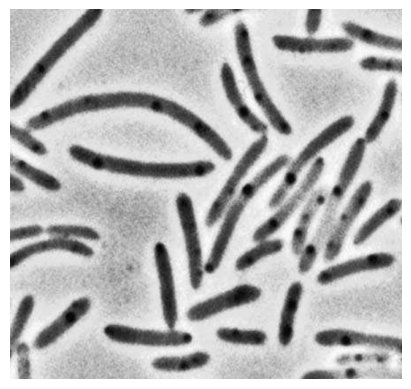

In [11]:
image = plt.imread('./img/bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray')
plt.axis('off')
image.shape
plt.show()

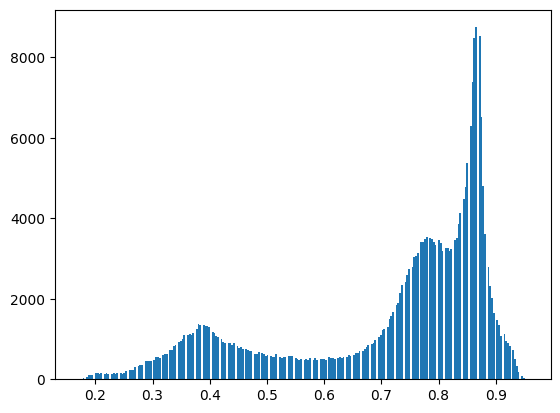

In [12]:
# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

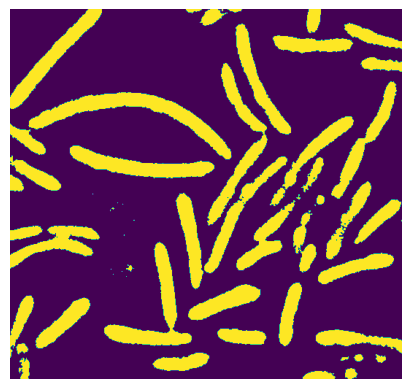

In [13]:
# boolean indexing: création d'une image binaire
image= image<0.6
plt.axis('off')
plt.imshow(image)

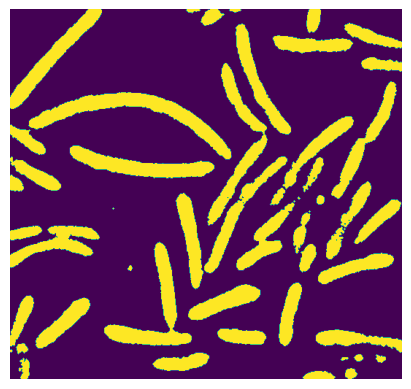

In [14]:
# morphologie utilisée pour enlever les artefacts
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)
plt.axis('off')
plt.show()

In [15]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

il y a 53 groupes


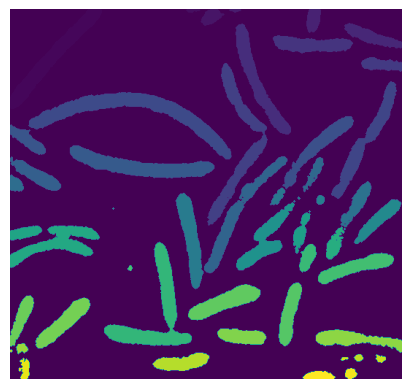

In [16]:
# Visualisation de l'image étiquetée
plt.imshow(label_image)
plt.axis('off')
plt.show()

In [17]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

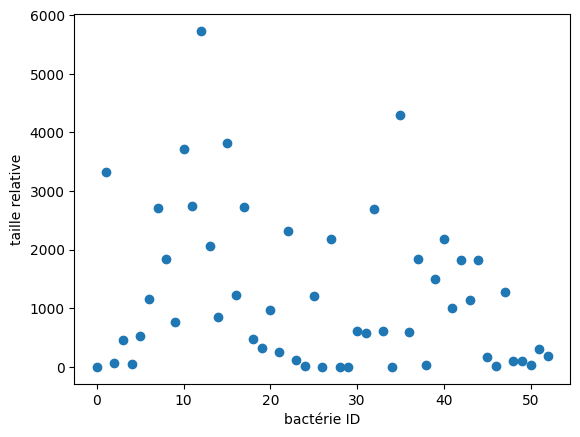

In [18]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()